# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2384 Тимченко Дмитрий Алексеевич и Цыганков Роман Максимович. Вариант №.19

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Частота дискретизации:

$ f_d = \frac{1}{T} $

Дискретный комплексный гармонический сигнал:

$ s_2(k) = C \exp\!\big(j \omega_0 k \big) $

Единичный цифровой импульс:

$ \delta_d(k) =
\begin{cases}
1, & k = 0, \\
0, & k \neq 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дискретный единичный скачок:

$ \sigma_d(k) =
\begin{cases}
1, & k \geq 0, \\
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дельта-функция (функция Дирака):

$ \delta(t) =
\begin{cases}
\infty, & t = 0, \\
0, & t \neq 0.
\end{cases} $

Функция единичного скачка (функция Хевисайда):

$ \sigma(t) =
\begin{cases}
1, & t > 0, \\
0.5 \ или \ не \ определена, & t = 0, \\
0, & t < 0.
\end{cases} $

Дискретная экспоненциальная функция:

$ s_1(k) =
\begin{cases}
0, & k < 0, \\
a^k, & k \geq 0,
\end{cases}
\quad k \in \mathbb{Z} $

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [115]:
Nbr = 19
N = 30 + Nbr % 5
T = 0.0005 * (1 + Nbr % 3)
a = (-1) ** Nbr * (0.8 + 0.005 * (Nbr % 20))
C = 1 + Nbr % 5
m = 5 + Nbr % 5
w0 = numpy.pi/(6 + Nbr % 5)
print(f'Nbr = {Nbr}, N = {N}, T = {T}, a = {a}, C = {C}, w0 = {w0}, m = {m}')

Nbr = 19, N = 34, T = 0.001, a = -0.895, C = 5, w0 = 0.3141592653589793, m = 9


## 1.Смоделировать единичный цифровой импульс с выводом графиков на интервале дискретного времени и дискретного нормированного времени 
# Пояснить:
* взаимосвязь между дискретным и дискретным нормированным временем;
* различие между единичным цифровым импульсом и дельта-функцией.

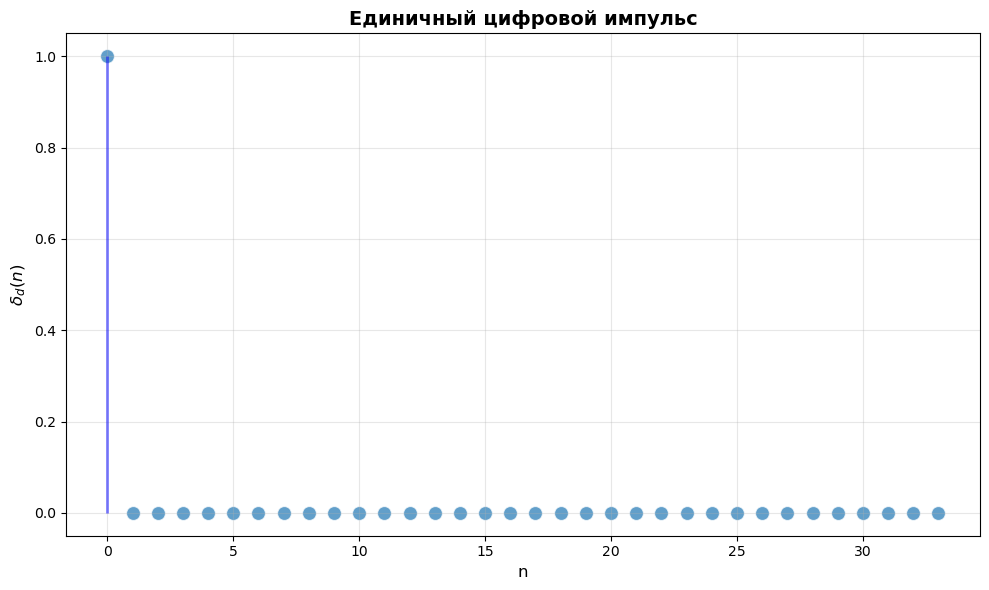

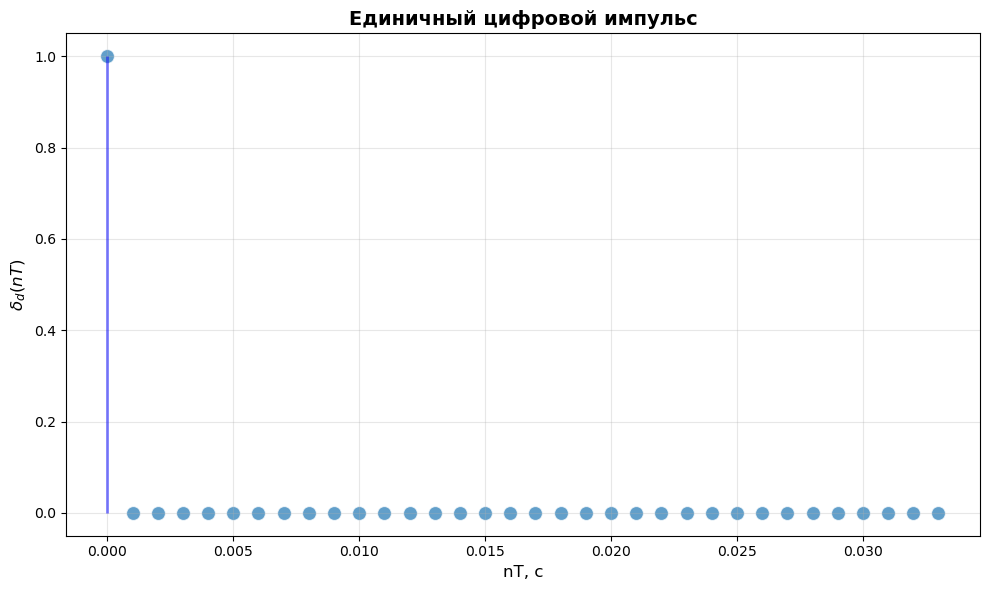

In [138]:
# Функция единичного цифрового импульса (дельта-функция)
def delta_d(k):
    return int(k == 0)

def build_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    
    import pandas as pd
    df = pd.DataFrame({'x': x, 'y': y})
    
    sns.scatterplot(data=df, x='x', y='y', s=100, alpha=0.7)
    plt.vlines(x=x, ymin=0, ymax=y, colors='blue', alpha=0.5, linewidth=2)
    
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Интервалы времени
n = np.arange(N)
nT = n * T

D = [delta_d(i) for i in n]
DT = [delta_d(i) for i in nT]

#нормированное время
build_plot(n, D, 'Единичный цифровой импульс', 'n', '$\\delta_d(n)$')

#дискретное время
build_plot(nT, DT, 'Единичный цифровой импульс', 'nT, с', '$\\delta_d(nT)$')



# Определения дискретного времени и импульсных функций

## a) Связь между дискретным нормированным временем и дискретным временем

**Дискретное нормированное время** ($n$) и **дискретное время** ($t$) связаны линейной зависимостью:

$$t = n \cdot T$$

где:
- $n \in \mathbb{Z}$ — целочисленный индекс (нормированное время)
- $t$ — физическое время в секундах
- $T$ — шаг дискретизации (интервал между отсчётами)

Нормированное время $n$ представляет собой номер отсчёта, а дискретное время $t$ соответствует физическому моменту времени для каждого отсчёта.

## b) Различие между единичным цифровым импульсом и дельта-функцией Дирака

**Единичный цифровой импульс** ($\delta_d(k)$) — **дискретная функция**, определённая только для целочисленных значений $k$:

$$\delta_d(k) = 
\begin{cases} 
1 & \text{если } k = 0 \\
0 & \text{если } k \neq 0 
\end{cases}, \quad k \in \mathbb{Z}$$

**Дельта-функция Дирака** ($\delta(t)$) — **обобщённая функция**, определённая на множестве вещественных чисел:

$$\delta(t) = 
\begin{cases} 
+\infty & \text{если } t = 0 \\
0 & \text{если } t \neq 0 
\end{cases}, \quad t \in \mathbb{R}$$

при этом выполняется условие нормировки:
$$\int_{-\infty}^{\infty} \delta(t)  dt = 1$$

## Ключевые различия

| Характеристика | Единичный цифровой импульс | Дельта-функция Дирака |
|----------------|---------------------------|----------------------|
| **Область определения** | Только целые числа ($\mathbb{Z}$) | Все вещественные числа ($\mathbb{R}$) |
| **Значение в нуле** | Конечное (1) | Бесконечное ($\infty$) |
| **Математическая природа** | Обычная функция | Обобщённая функция |
| **Нормировка** | Сумма $\sum_{k=-\infty}^{\infty} \delta_d(k) = 1$ | Интеграл $\int_{-\infty}^{\infty} \delta(t)  dt = 1$ |

Единичный цифровой импульс является **дискретным аналогом** дельта-функции Дирака для цифровой обработки сигналов.

## 2.Смоделировать дискретный единичный скачок с выводом графиков на интервале дискретного времени и дискретного нормированного времени 
# Пояснить:
* соответствие между дискретным и аналоговым единичными скачками;
* чему равна частота дискретизации дискретного единичного скачка.

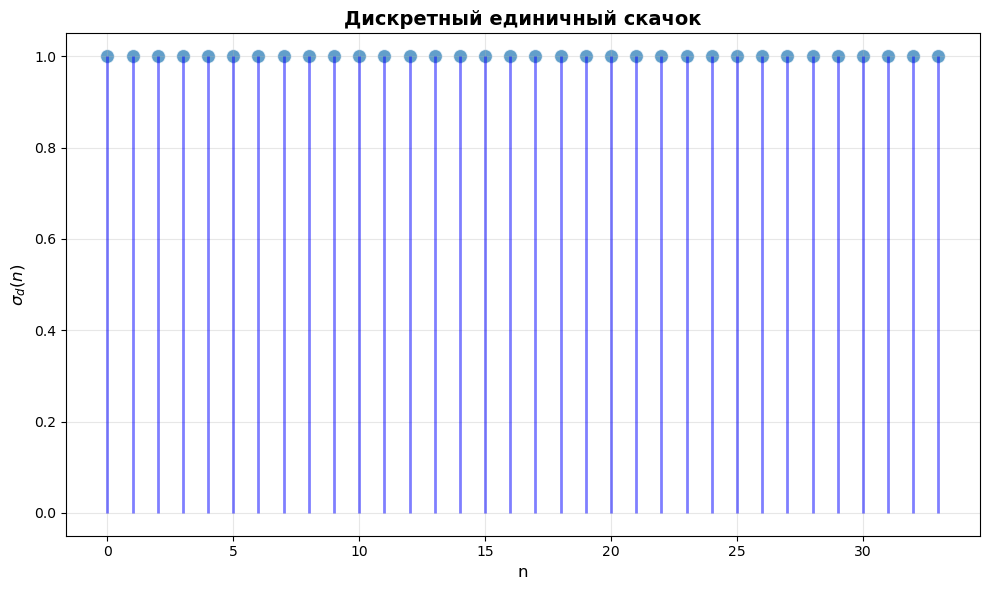

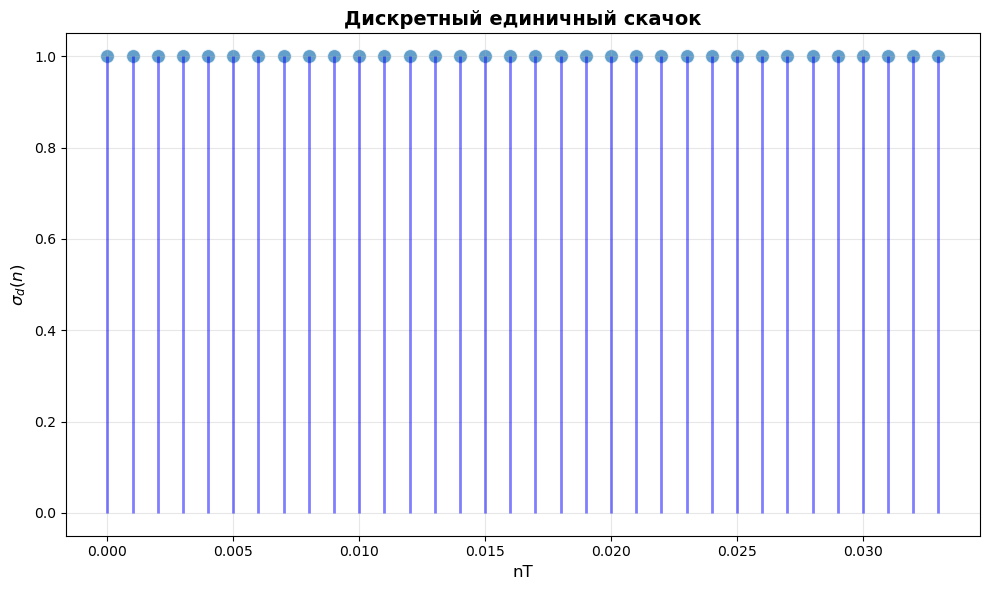

In [136]:
def sigma_d(k):
    """Функция дискретного единичного скачка"""
    return 1 if k >= 0 else 0

S = [sigma_d(i) for i in n]
ST = [sigma_d(i) for i in nT]

#нормированное время
build_plot(n, S, 'Дискретный единичный скачок', 'n', '$\\sigma_d(n)$')

#дискретное время
build_plot(nT, ST, 'Дискретный единичный скачок', 'nT', '$\\sigma_d(n)$')


# Дискретный единичный скачок и частота дискретизации

## a) Определение дискретного единичного скачка

**Дискретный единичный скачок** — это дискретное отображение аналогового единичного скачка (функции Хевисайда), примененное к дискретным моментам времени.

Математически определяется как:

$$\sigma_d(n) = 
\begin{cases} 
1 & \text{при } n \geq 0 \\
0 & \text{при } n < 0 
\end{cases}, \quad n \in \mathbb{Z}$$

где $n$ — дискретный временной индекс.

## b) Частота дискретизации

**Частота дискретизации** дискретного единичного скачка вычисляется по формуле:

$$f_d = \frac{1}{T}$$

где $T = 0.001$ с — шаг дискретизации.

Расчет частоты дискретизации:

$$f_d = \frac{1}{0.001} =  1000\text{ Гц}$$

### Пояснение:
- **$f_d = 1000$ Гц** означает, что сигнал дискретизируется 1000 раз в секунду
- **$T = 0.001$ с** — интервал между соседними отсчётами составляет 0.01 с
- Данная частота дискретизации обеспечивает временное разрешение 0.01 с для дискретного представления сигнала

## 3.Смоделировать дискретную экспоненциальную функцию с выводом графиков на интервале дискретного времени и дискретного нормированного времени 

* Пояснить соответствие между дискретной и аналоговой экспонентами.

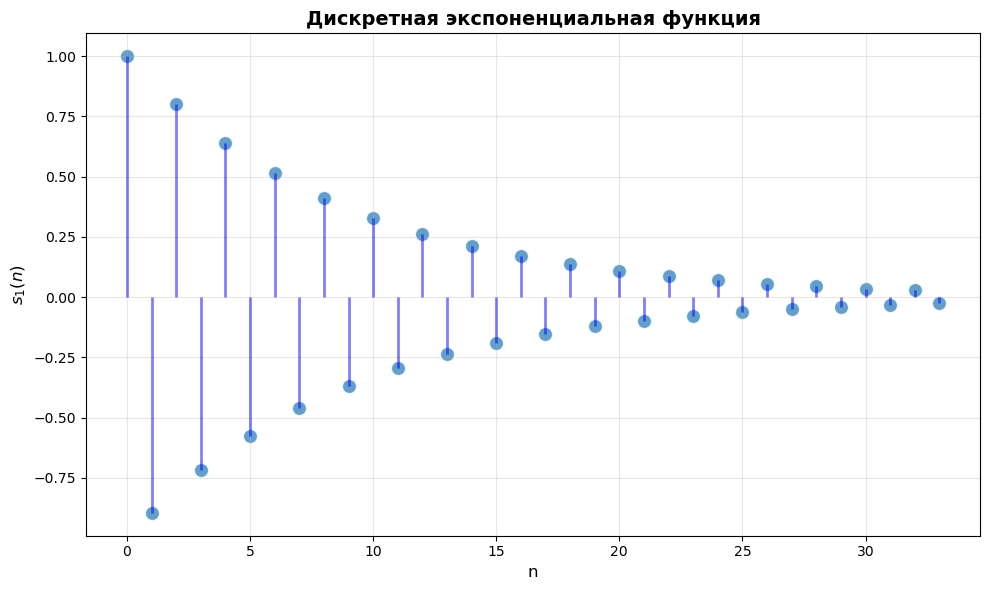

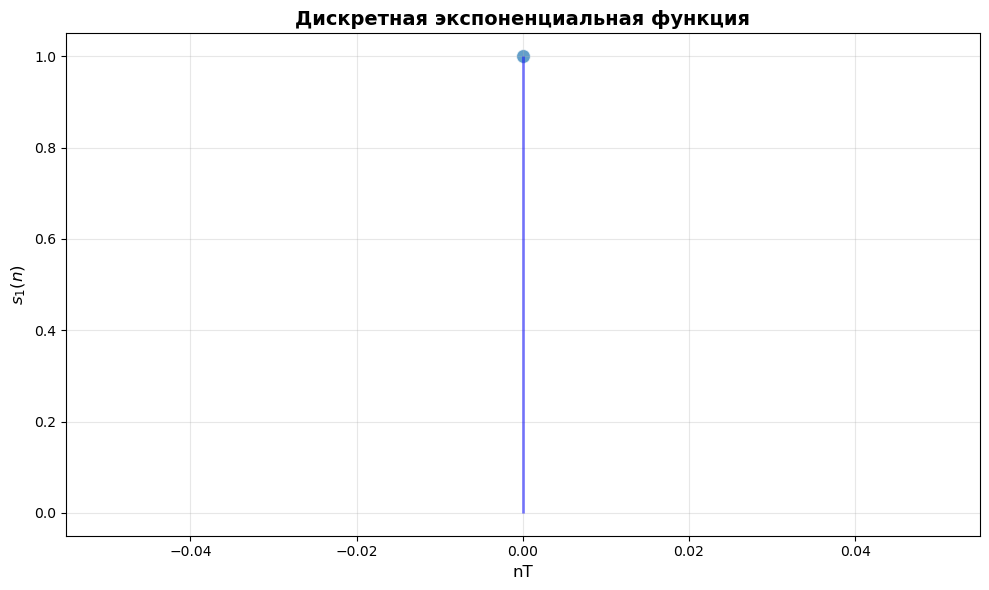

In [134]:
def s1(k):
    """Дискретная экспоненциальная функция"""
    if k < 0:
        return 0
    elif k == 0:
        return 1  # a^0 = 1 для любого a (кроме a=0, но это особый случай)
    else:
        return a ** k

#нормированное время
build_plot(n, S1, 'Дискретная экспоненциальная функция', 'n', '$s_1(n)$')

#дискретное время
build_plot(nT, S1T, 'Дискретная экспоненциальная функция', 'nT', '$s_1(n)$')


# Дискретная экспонента

## Определение дискретной экспоненты

**Дискретная экспонента** — это последовательность значений непрерывной экспоненциальной функции, взятых с интервалом дискретизации во времени.

Математически определяется как:

### Вещественная дискретная экспонента:
$$x[n] = e^{\alpha nT} = a^n, \quad \text{где } a = e^{\alpha T}$$

### Комплексная дискретная экспонента:
$$x[n] = e^{(\sigma + j\omega)nT} = e^{\sigma nT} \cdot e^{j\omega nT}$$
$$x[n] = r^n \cdot e^{j\theta n}, \quad \text{где } r = e^{\sigma T}, \ \theta = \omega T$$

где:
- $n \in \mathbb{Z}$ — дискретный временной индекс
- $T$ — интервал дискретизации
- $\alpha$, $\sigma$ — параметры затухания/роста
- $\omega$ — угловая частота

## Связь с непрерывной экспонентой

Если непрерывный сигнал имеет вид:
$$x(t) = e^{\alpha t}$$

то его дискретная версия:
$$x[n] = x(nT) = e^{\alpha nT} = (e^{\alpha T})^n = a^n$$

## Свойства дискретной экспоненты:
- **Периодичность**: Комплексная экспонента периодична, если $\theta = \frac{2\pi k}{N}$
- **Затухание/рост**: При $|a| < 1$ — затухающая, при $|a| > 1$ — растущая
- **Дискретность**: Определена только для целочисленных значений времени $n$

## 4. Смоделировать дискретный комплексный гармонический сигнал с выводом графиков вещественной и мнимой частей на интервале времени Записать данный сигнал в виде комбинации двух вещественных последовательностей.

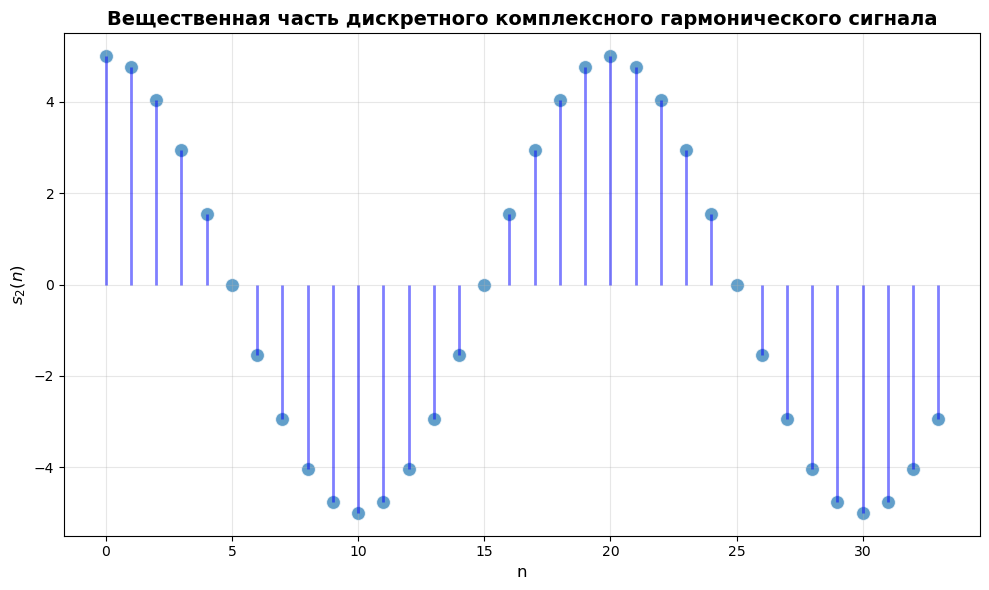

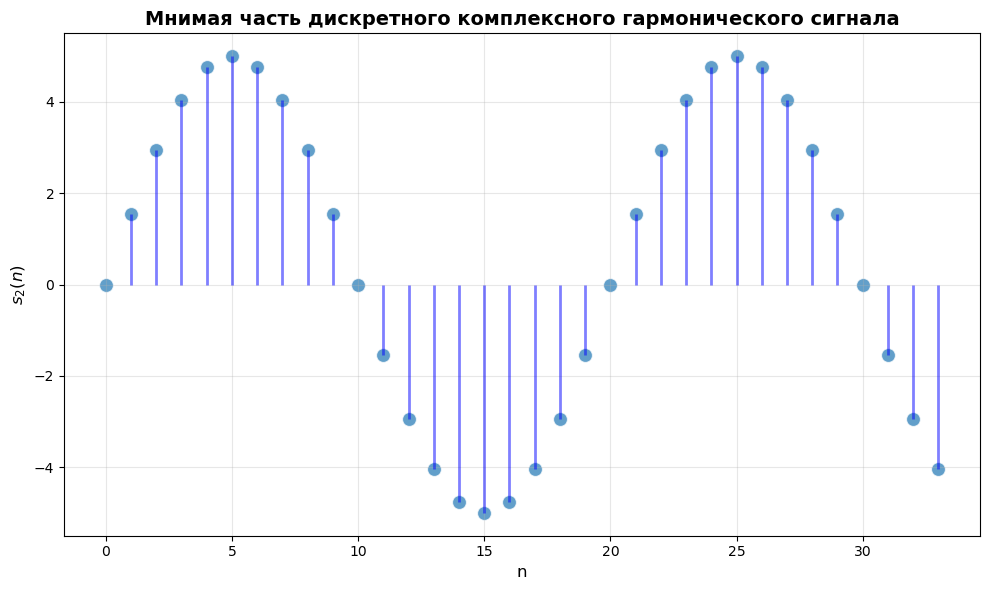

In [142]:
def s2(k):
    """Дискретная комплексная экспоненциальная функция"""
    return C * np.exp(1j * w0 * k)

S2_real = [np.real(s2(i)) for i in n]
S2_imag = [np.imag(s2(i)) for i in n]

#вещественная часть
build_plot(n, S2_real, 'Вещественная часть дискретного комплексного гармонического сигнала', 'n', '$s_2(n)$')

#мнимая часть
build_plot(n, S2_imag, 'Мнимая часть дискретного комплексного гармонического сигнала', 'n', '$s_2(n)$')

# Дискретный комплексный гармонический сигнал

## Математическое представление сигнала

Исходный комплексный сигнал:
$$s_2[k] = C \cdot e^{j\omega_0 k}$$

где:
- $C = 5$ - амплитуда сигнала
- $\omega_0 = \frac{\pi}{10} \approx 0.3142$ - нормированная угловая частота
- $k \in \mathbb{Z}$ - дискретное время

## Представление в виде комбинации вещественных последовательностей

Используя формулу Эйлера, раскладываем комплексную экспоненту:

$$s_2[k] = C \cdot e^{j\omega_0 k} = C \cdot \cos(\omega_0 k) + j \cdot C \cdot \sin(\omega_0 k)$$

Таким образом, сигнал представляется как комбинация двух вещественных последовательностей:

### Вещественная часть (косинусоидальная составляющая):
$$\text{Re}\{s_2[k]\} = C \cdot \cos(\omega_0 k) = 5 \cdot \cos\left(\frac{\pi}{10} \cdot k\right)$$

### Мнимая часть (синусоидальная составляющая):
$$\text{Im}\{s_2[k]\} = C \cdot \sin(\omega_0 k) = 5 \cdot \sin\left(\frac{\pi}{10} \cdot k\right)$$

## Параметры сигнала

- **Амплитуда**: $C = 5$
- **Нормированная частота**: $\omega_0 = \frac{\pi}{10} \approx 0.3142$ рад/отсчет
- **Период**: $N_0 = \frac{2\pi}{\omega_0} = 20$ отсчетов
- **Частота**: $f_0 = \frac{\omega_0}{2\pi} = 0.05$ циклов/отсчет

## Графическое представление

Сигнал представляется двумя графиками:
1. **Вещественная часть** - косинусоида с амплитудой 5 и периодом 20 отсчетов
2. **Мнимая часть** - синусоида с амплитудой 5 и периодом 20 отсчетов

Обе составляющие сдвинуты по фазе на 90° (π/2 радиан) относительно друг друга.

## 5. Вывести графики последовательностей $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанных на $m$ отсчетов, на интервале времени $n \in [0, N-1]$. Записать формулы задержанных последовательностей.

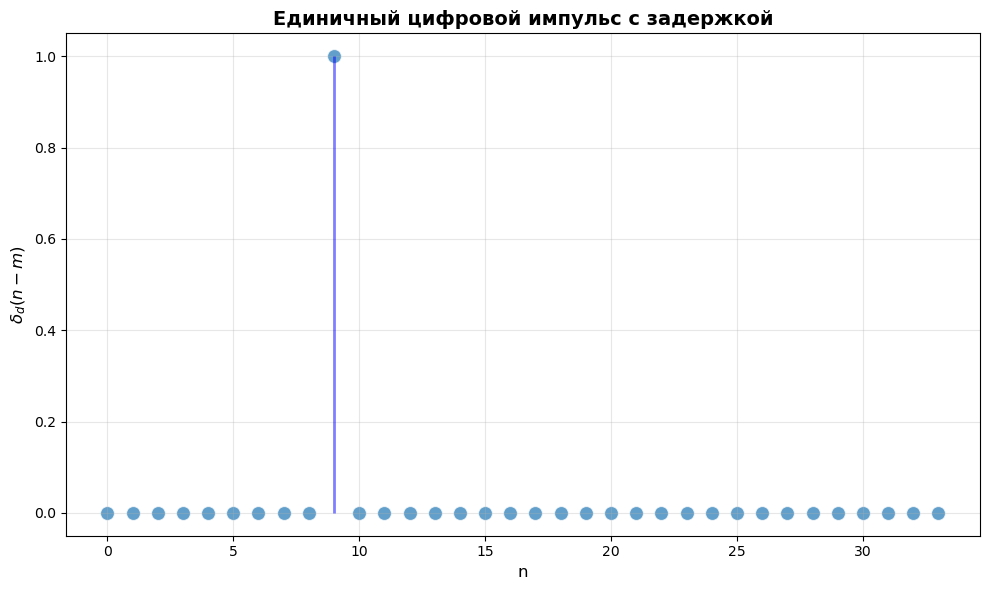

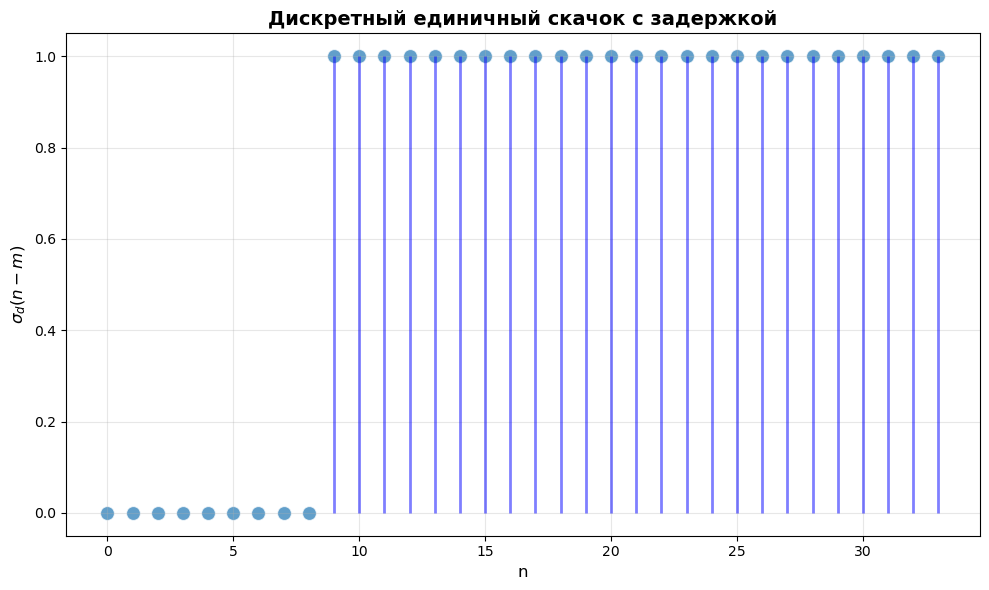

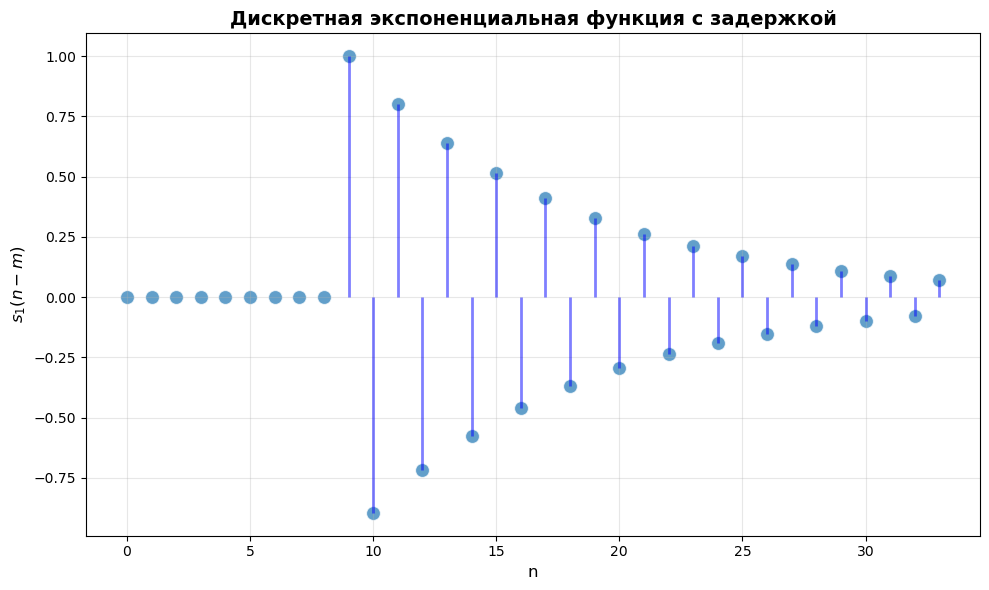

In [146]:
D = [delta_d(i - m) for i in n]
S = [sigma_d(i - m) for i in n]
S1 = [s1(i - m) for i in n]

# Графики задержанных последовательностей
build_plot(n, D, 'Единичный цифровой импульс с задержкой', 'n', '$\\delta_d(n - m)$')
build_plot(n, S, 'Дискретный единичный скачок с задержкой', 'n', '$\\sigma_d(n - m)$')
build_plot(n, S1, 'Дискретная экспоненциальная функция с задержкой', 'n', '$s_1(n - m)$')

# Формулы задержанных дискретных последовательностей

## Единичный цифровой импульс с задержкой на $m$ отсчетов

$$\delta_d(k - m) = 
\begin{cases} 
1 & \text{при } k = m \\
0 & \text{при } k \neq m 
\end{cases}, \quad k \in \mathbb{Z}$$

## Дискретный единичный скачок с задержкой на $m$ отсчетов

$$\sigma_d(k - m) = 
\begin{cases} 
1 & \text{при } k \geq m \\
0 & \text{при } k < m 
\end{cases}, \quad k \in \mathbb{Z}$$

## Дискретная экспоненциальная функция с задержкой на $m$ отсчетов

$$s_1(k - m) = 
\begin{cases} 
a^{k - m} & \text{при } k \geq m \\
0 & \text{при } k < m 
\end{cases}, \quad k \in \mathbb{Z}$$

# Выводы

В ходе выполнения лабораторной работы были получены следующие результаты:

## 1. Моделирование дискретных последовательностей
- Смоделированы стандартные дискретные последовательности:
  - Единичный цифровой импульс $\delta_d(k)$
  - Единичный скачок $\sigma_d(k)$  
  - Экспоненциальная функция $s_1(k)$
  - Комплексный гармонический сигнал $s_2(k)$

## 2. Анализ временных характеристик
- Определена связь между дискретным и нормированным временем: $t = nT$
- Показаны принципиальные отличия дискретных сигналов от аналоговых:
  - Дискретные функции определены только для целых значений
  - Единичный импульс имеет конечное значение в нуле
  - Отсутствуют сингулярности

## 3. Представление комплексного сигнала
- Комплексный гармонический сигнал записан в виде комбинации двух вещественных последовательностей:
  $$s_2(k) = C \cdot \cos(\omega_0 k) + j \cdot C \cdot \sin(\omega_0 k)$$

## 4. Анализ задержанных последовательностей
- Построены графики последовательностей с задержкой на $m$ отсчетов
- Получены аналитические выражения для задержанных версий всех трёх базовых последовательностей
- Проанализировано влияние задержки на форму сигналов